In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import streamlit as st

In [3]:
df = pd.read_csv(r"D:\Data Science\data world ds\task 4\Data\credit_card_transactions_cleaned.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,28705.0
2,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,83236.0
3,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
4,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,17972.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867683 entries, 0 to 867682
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             867683 non-null  int64  
 1   trans_date_trans_time  867683 non-null  object 
 2   cc_num                 867683 non-null  int64  
 3   merchant               867683 non-null  object 
 4   category               867683 non-null  object 
 5   amt                    867683 non-null  float64
 6   first                  867683 non-null  object 
 7   last                   867683 non-null  object 
 8   gender                 867683 non-null  object 
 9   street                 867683 non-null  object 
 10  city                   867683 non-null  object 
 11  state                  867683 non-null  object 
 12  zip                    867683 non-null  int64  
 13  lat                    867683 non-null  float64
 14  long                   867683 non-nu

In [5]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
merch_zipcode            0
dtype: int64

Exploratory Data Analysis (EDA)

Basic EDA Questions (Beginner-Level)

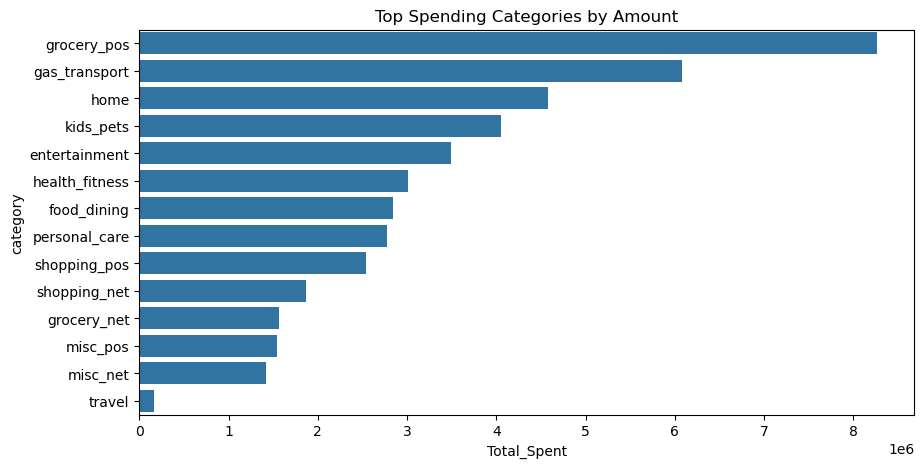

In [6]:
# 1. What are the top spending categories by transaction volume and amount?
# Group by Category and get total count and amount
category_summary = df.groupby('category').agg({'amt': ['sum', 'count']}).reset_index()
category_summary.columns = ['category', 'Total_Spent', 'Transaction_Count']

# Sort by Total_Spent and plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Total_Spent', y='category', data=category_summary.sort_values('Total_Spent', ascending=False))
plt.title("Top Spending Categories by Amount")
plt.show()

In [7]:
print(df['trans_date_trans_time'].dtypes)


object


In [8]:
#How does spending vary over time (daily, weekly, monthly trends)?
# Convert the column to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract Year, Month, and Day
df['Year'] = df['trans_date_trans_time'].dt.year
df['Month'] = df['trans_date_trans_time'].dt.month
df['Day'] = df['trans_date_trans_time'].dt.day

# Display first few rows
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,Year,Month,Day
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,2019,1,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,28705.0,2019,1,1
2,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,83236.0,2019,1,1
3,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,2019,1,1
4,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,17972.0,2019,1,1


In [9]:
print(df['trans_date_trans_time'].dtypes)

datetime64[ns]


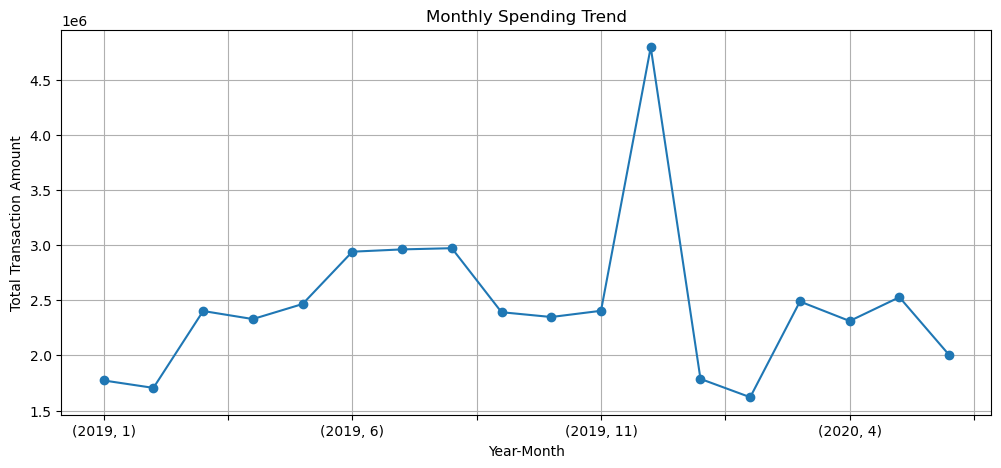

In [10]:
# Plot Monthly Trends
plt.figure(figsize=(12, 5))
df.groupby(['Year', 'Month'])['amt'].sum().plot(marker='o')
plt.title("Monthly Spending Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Transaction Amount")
plt.grid()
plt.show()

In [11]:
#3. What are the peak spending hours in a day?
# Extract hour from transaction date
df['Hour'] = df['trans_date_trans_time'].dt.hour

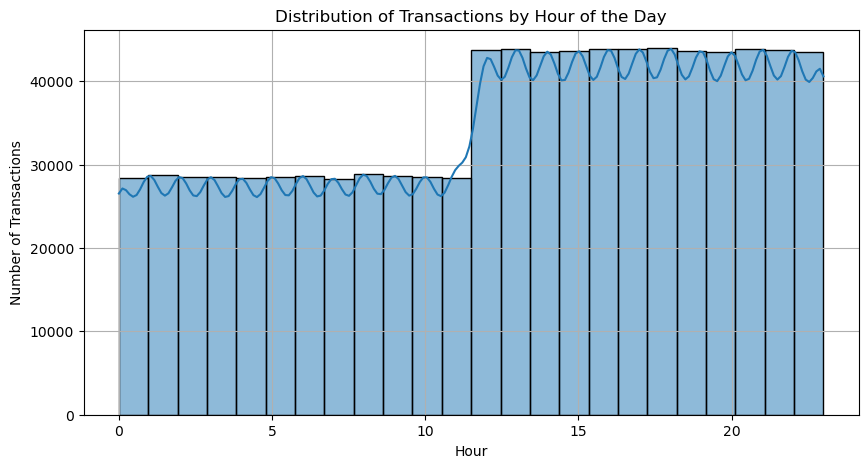

In [12]:
# Plot histogram of transaction hours
plt.figure(figsize=(10, 5))
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title("Distribution of Transactions by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Transactions")
plt.grid()
plt.show()

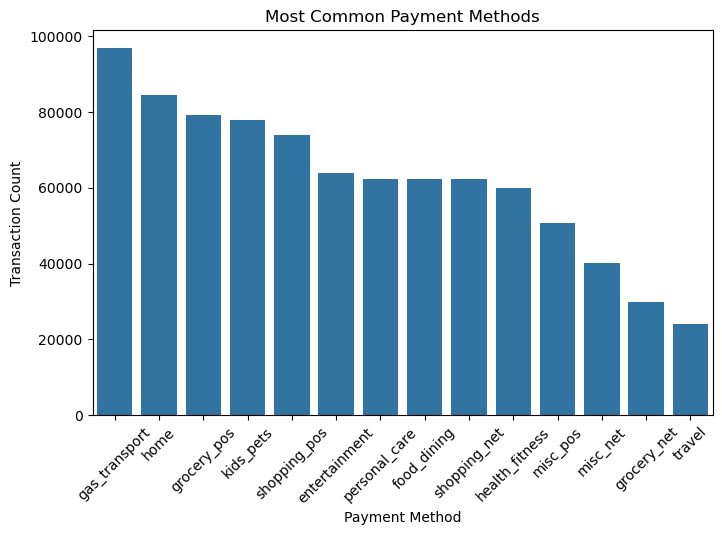

In [13]:
#4. What is the most common payment method used?
# Count transactions by Payment Method
payment_summary = df['category'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=payment_summary.index, y=payment_summary.values)
plt.title("Most Common Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.show()


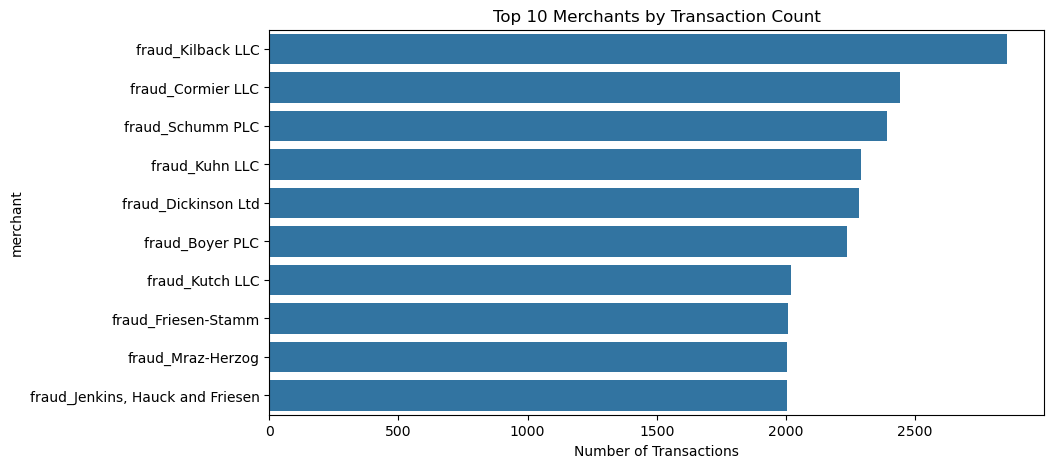

In [14]:
# 5. Which merchants have the highest transactions?
# Get top 10 merchants by transaction count
top_merchants = df['merchant'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_merchants.values, y=top_merchants.index)
plt.title("Top 10 Merchants by Transaction Count")
plt.xlabel("Number of Transactions")
plt.show()


Intermediate EDA Questions

In [15]:
#1. Are there seasonal trends in spending across different categories?
# Extract year and month
df['Year'] = df['trans_date_trans_time'].dt.year
df['Month'] = df['trans_date_trans_time'].dt.month


In [16]:
# Aggregate total spending per category per month
seasonal_trends = df.groupby(['category', 'Year', 'Month'])['amt'].sum().reset_index()

<Figure size 1200x600 with 0 Axes>

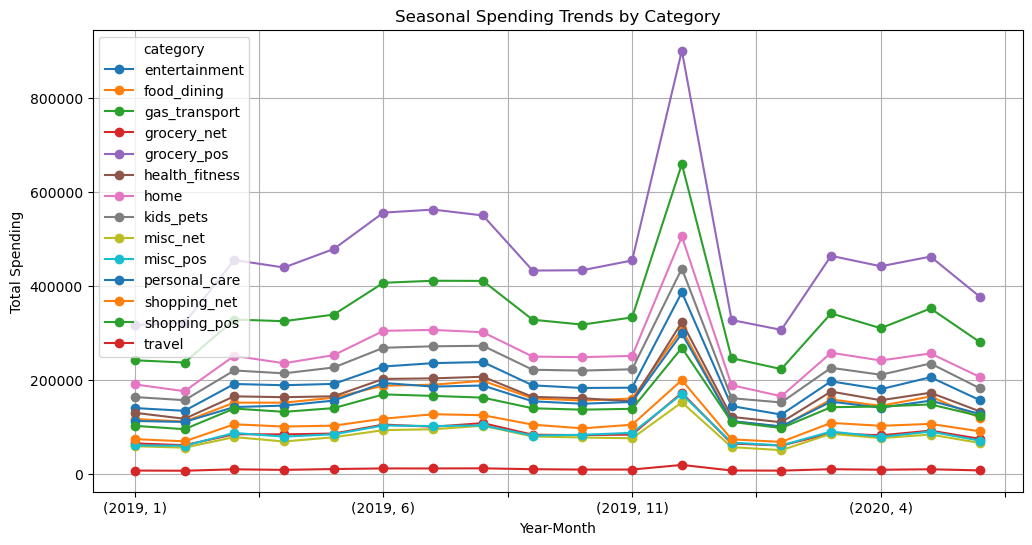

In [17]:
# Pivot for visualization
seasonal_pivot = seasonal_trends.pivot_table(index=['Year', 'Month'], columns='category', values='amt')

# Plot seasonal trends
plt.figure(figsize=(12, 6))
seasonal_pivot.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Seasonal Spending Trends by Category")
plt.xlabel("Year-Month")
plt.ylabel("Total Spending")
plt.grid()
plt.show()

In [18]:
# 2. How do different customer segments (high spenders vs. low spenders) behave?


# Compute median transaction amount
median_spend = df['amt'].median()

# Create a new column for customer segmentation
df['Spender_Type'] = df['amt'].apply(lambda x: 'High Spender' if x > median_spend else 'Low Spender')

# Display counts of each segment
print(df['Spender_Type'].value_counts())


Spender_Type
Low Spender     433855
High Spender    433828
Name: count, dtype: int64


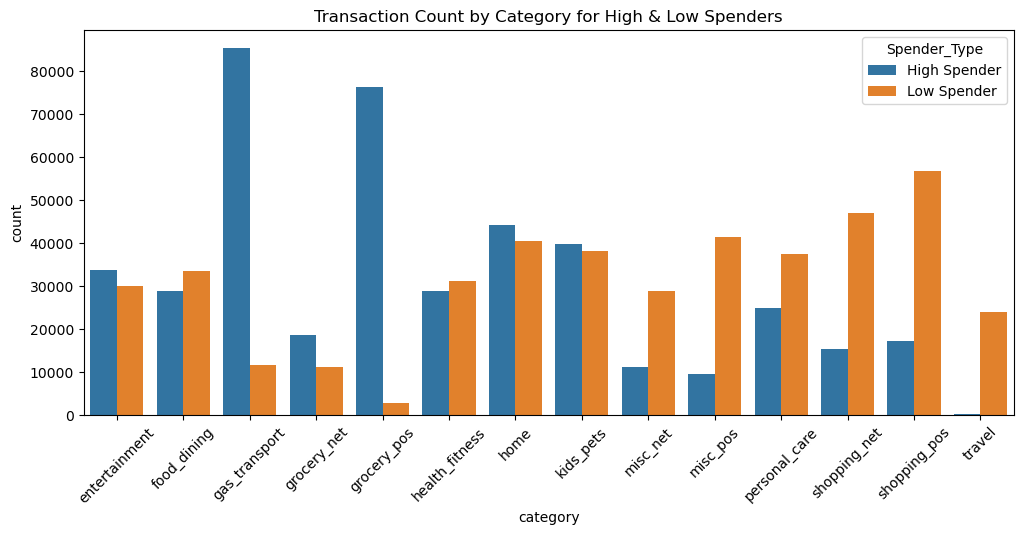

In [19]:
# Compare Behavior of High vs. Low Spenders

#1. Spending Distribution per Category

# Aggregate transaction count & amount per category for each segment
category_summary = df.groupby(['Spender_Type', 'category'])['amt'].agg(['sum', 'count']).reset_index()

# Plot transaction count per category
plt.figure(figsize=(12, 5))
sns.barplot(x='category', y='count', hue='Spender_Type', data=category_summary)
plt.xticks(rotation=45)
plt.title("Transaction Count by Category for High & Low Spenders")
plt.show()

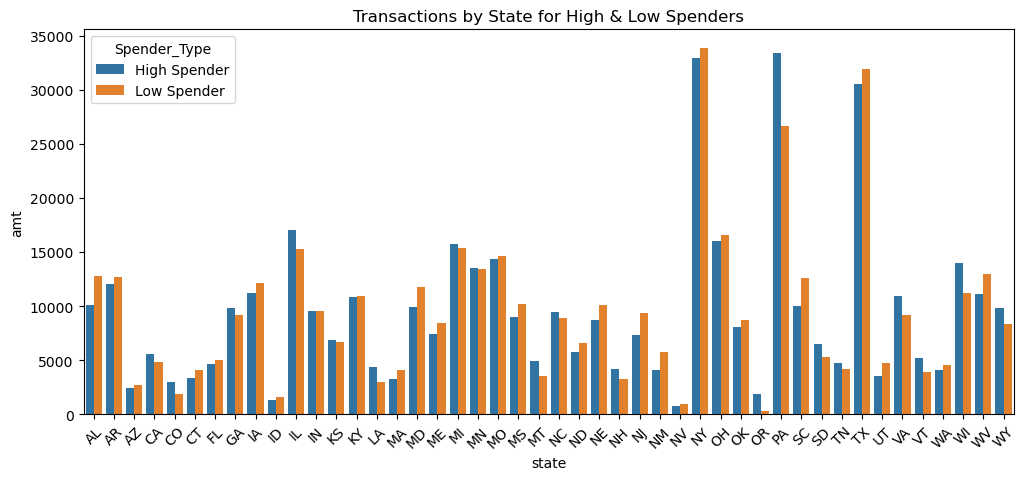

In [20]:
# 2. Transaction Count by State

# Aggregate transaction counts per state for each segment
state_summary = df.groupby(['Spender_Type', 'state'])['amt'].count().reset_index()

# Plot transactions per state
plt.figure(figsize=(12, 5))
sns.barplot(x='state', y='amt', hue='Spender_Type', data=state_summary)
plt.xticks(rotation=45)
plt.title("Transactions by State for High & Low Spenders")
plt.show()


In [21]:
# 3. Fraud Analysis in High vs. Low Spenders

# Fraud rate for each segment
fraud_summary = df.groupby('Spender_Type')['is_fraud'].mean()

print("Fraud Rate by Customer Segment:")
print(fraud_summary)


Fraud Rate by Customer Segment:
Spender_Type
High Spender    0.0
Low Spender     0.0
Name: is_fraud, dtype: float64


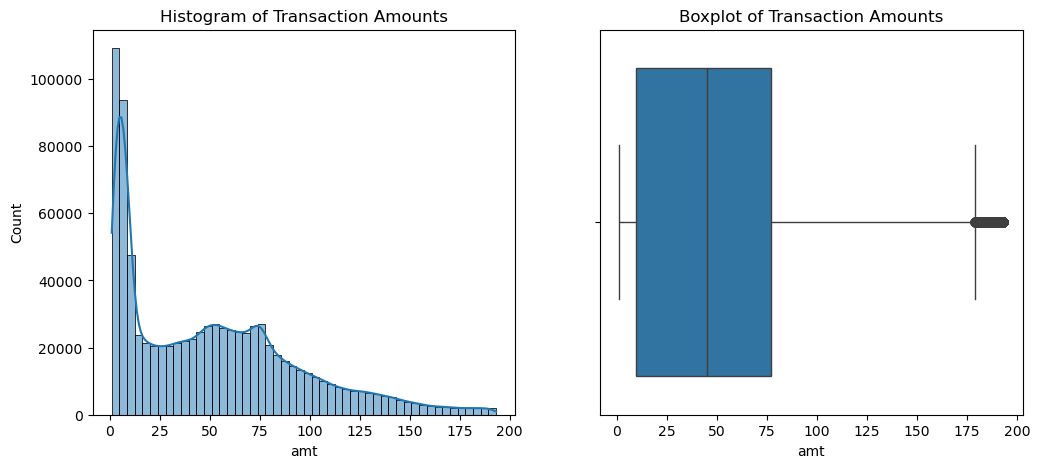

In [22]:
# 3. What is the distribution of transaction amounts?

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['amt'], bins=50, kde=True)
plt.title("Histogram of Transaction Amounts")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['amt'])
plt.title("Boxplot of Transaction Amounts")

plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15264\702476165.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='amt', data=state_spending, palette='coolwarm')


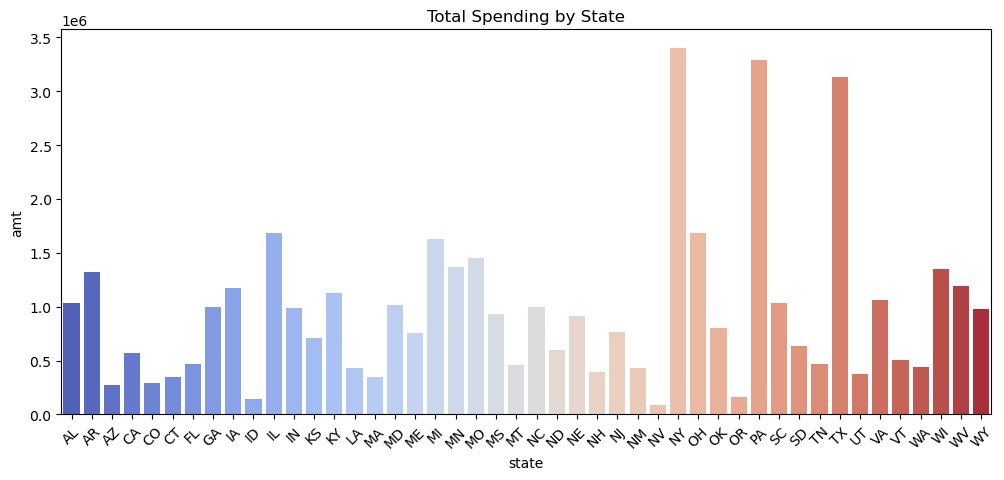

In [23]:
# 4. Are there any correlations between spending behavior and location?

#Spending by State

# Aggregate spending by state
state_spending = df.groupby('state')['amt'].sum().reset_index()

# Plot spending by state
plt.figure(figsize=(12, 5))
sns.barplot(x='state', y='amt', data=state_spending, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Total Spending by State")
plt.show()


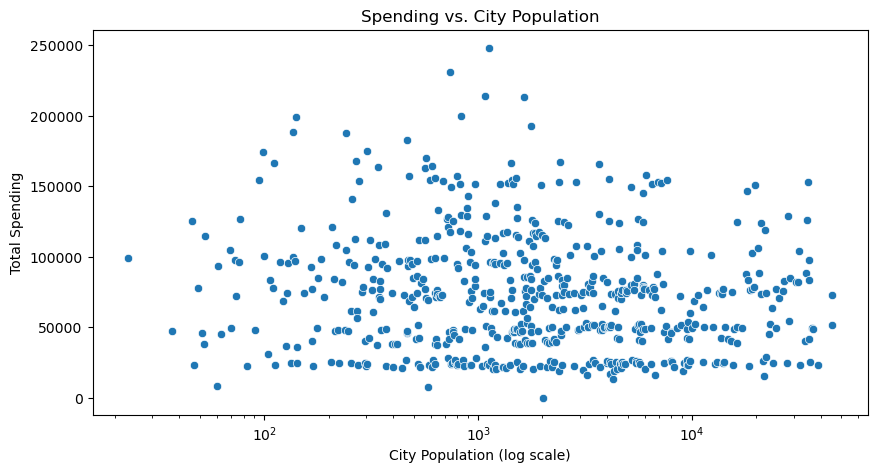

In [24]:
# Spending vs. City Population

# Aggregate spending by city
city_spending = df.groupby('city_pop')['amt'].sum().reset_index()

# Scatter plot of city population vs. total spending
plt.figure(figsize=(10, 5))
sns.scatterplot(x='city_pop', y='amt', data=city_spending)
plt.xscale('log')  # Log scale for better visualization
plt.title("Spending vs. City Population")
plt.xlabel("City Population (log scale)")
plt.ylabel("Total Spending")
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


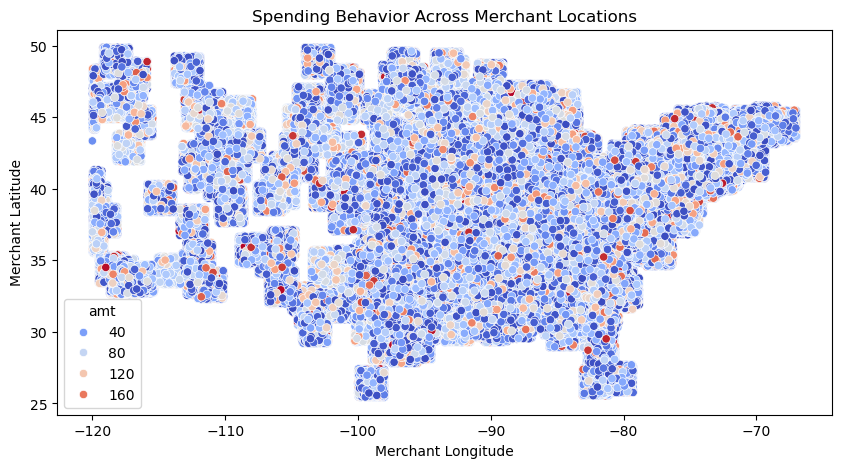

In [25]:
# Scatter plot: Transaction amount vs. merchant location
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['merch_long'], y=df['merch_lat'], hue=df['amt'], palette='coolwarm')
plt.title("Spending Behavior Across Merchant Locations")
plt.xlabel("Merchant Longitude")
plt.ylabel("Merchant Latitude")
plt.show()


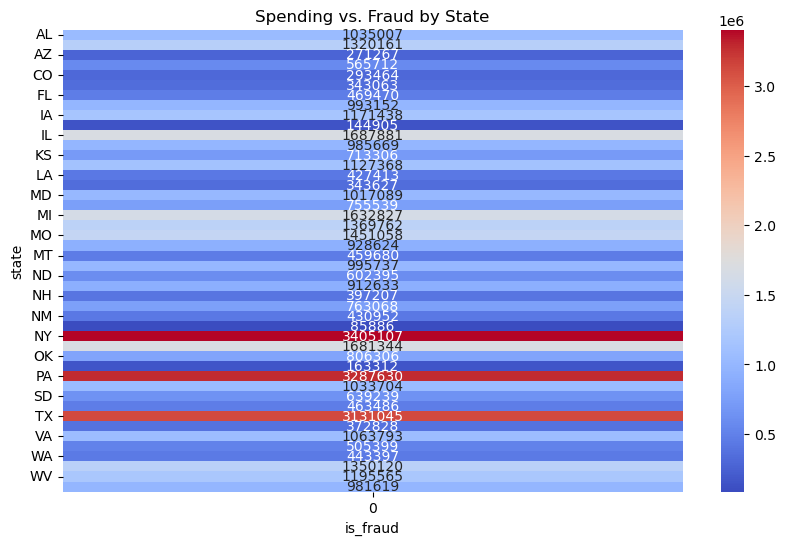

In [26]:
# Heatmap of Spending by State & Fraud

# Pivot table for heatmap
state_fraud_spending = df.pivot_table(values='amt', index='state', columns='is_fraud', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(state_fraud_spending, cmap='coolwarm', annot=True, fmt='.0f')
plt.title("Spending vs. Fraud by State")
plt.show()


In [27]:
# 5. How does spending behavior change before and after payday?

# Extract day of the month
df['Day_of_Month'] = df['trans_date_trans_time'].dt.day

# Define pre-payday and post-payday spending
pre_payday = df[(df['Day_of_Month'] >= 27) | (df['Day_of_Month'] <= 1)]
post_payday = df[(df['Day_of_Month'] >= 2) & (df['Day_of_Month'] <= 6)]

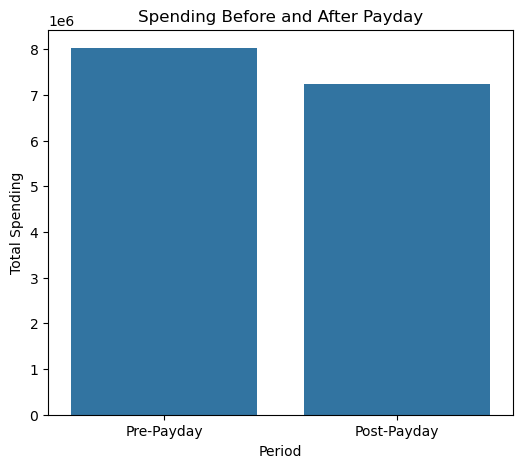

In [28]:
# Aggregate spending
pre_post_comparison = pd.DataFrame({
    'Period': ['Pre-Payday', 'Post-Payday'],
    'Total_Spending': [pre_payday['amt'].sum(), post_payday['amt'].sum()]
})

# Plot spending before and after payday
plt.figure(figsize=(6, 5))
sns.barplot(x='Period', y='Total_Spending', data=pre_post_comparison)
plt.title("Spending Before and After Payday")
plt.ylabel("Total Spending")
plt.show()

Advanced EDA

1. Outlier Detection using Anomaly Detection

In [28]:
# using raw data for this step
data=pd.read_csv(r'D:\Data Science\data world ds\task 4\Data\credit_card_transactions.csv')

In [29]:
from sklearn.ensemble import IsolationForest

In [39]:
# Define Isolation Forest model
iso_forest = IsolationForest(contamination=0.02, random_state=42)

# Fit model on transaction amount
data['Outlier_Score'] = iso_forest.fit_predict(data[['amt']])

In [40]:
# Mark anomalies
data['Anomaly'] = data['Outlier_Score'].apply(lambda x: 'Outlier' if x == -1 else 'Normal')

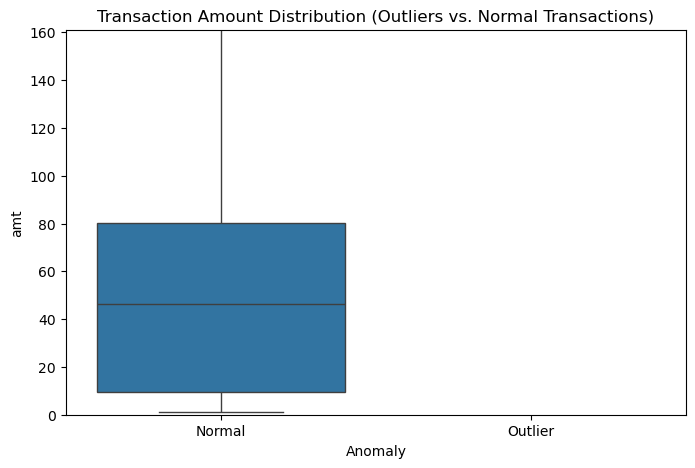

In [41]:
# Plot normal vs anomalous transactions
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Anomaly'], y=data['amt'])
plt.title("Transaction Amount Distribution (Outliers vs. Normal Transactions)")
plt.ylim(0, df['amt'].quantile(0.98))  # Remove extreme values
plt.show()

2. Customer Segmentation using K-Means & DBSCAN

In [35]:
from sklearn.cluster import  DBSCAN

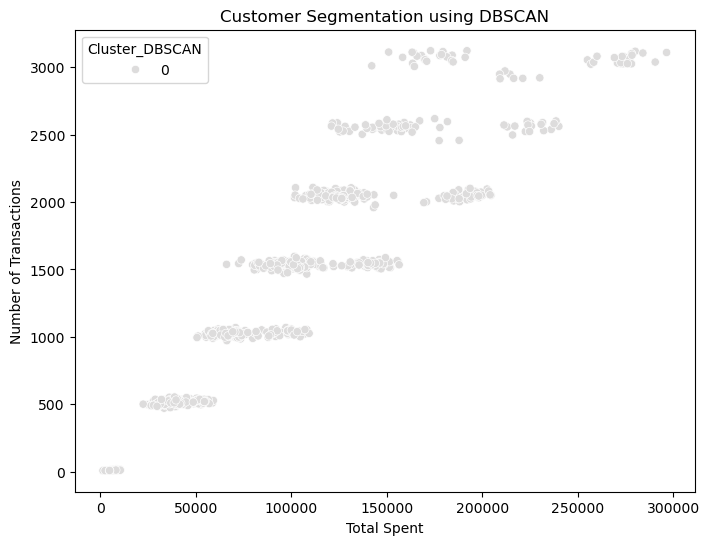

                  Total_Spent
Cluster_KMeans               
0               160224.074277
1                66170.988513
2                 6021.595616
Cluster_DBSCAN
0    983
Name: count, dtype: int64


3. Association Rule Mining (Apriori, FP-Growth)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4140\3178159488.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


category                          entertainment  food_dining  gas_transport  \
trans_num                                                                     
00000ecad06b03d3a8d34b4e30b5ce3b              0            0              0   
0000246d803d5f465cc322d8a3c3528f              0            0              0   
0000258ae973a6199fca79d94947672f              0            0              0   
0000307898b3352b5a0d66015d362794              1            0              0   
0000425d184356a21be4b39933c2c0ea              0            0              0   

category                          grocery_net  grocery_pos  health_fitness  \
trans_num                                                                    
00000ecad06b03d3a8d34b4e30b5ce3b            0            0               0   
0000246d803d5f465cc322d8a3c3528f            0            0               0   
0000258ae973a6199fca79d94947672f            0            1               0   
0000307898b3352b5a0d66015d362794            0           

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4140\3580276991.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: x > 0)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


4. Correlation with Economic Factors (Inflation, Interest Rates)

In [1]:
# Load The dataset
economic_data= pd.read_csv(r'D:\Data Science\data world ds\task 4\Data\us_economic_data_2019_2020.csv')
df = pd.read_csv(r"D:\Data Science\data world ds\task 4\Data\credit_card_transactions_cleaned.csv")


NameError: name 'pd' is not defined

In [125]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])  # Ensure it's datetime
df['YearMonth'] = df['trans_date_trans_time'].dt.to_period('M')  # Convert to Year-Month



In [126]:
economic_data['Date'] = pd.to_datetime(economic_data['Date'])  # Ensure it's datetime
economic_data['YearMonth'] = economic_data['Date'].dt.to_period('M')  # Convert to Year-Month

In [127]:
df = df.merge(economic_data, on='YearMonth', how='left')


In [128]:
print(df[['Inflation Rate (%)', 'GDP Growth Rate (%)']].isna().sum())


Inflation Rate (%)     0
GDP Growth Rate (%)    0
dtype: int64


                          amt  Inflation Rate (%)  GDP Growth Rate (%)
amt                  1.000000           -0.001274             0.000170
Inflation Rate (%)  -0.001274            1.000000             0.008618
GDP Growth Rate (%)  0.000170            0.008618             1.000000


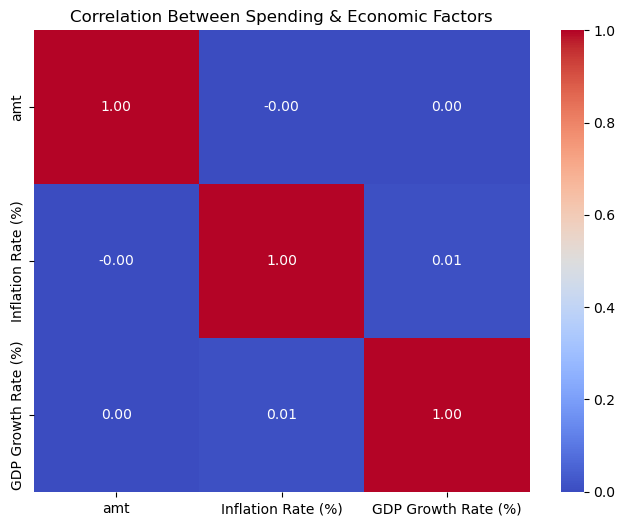

In [129]:
correlation_matrix = df[['amt', 'Inflation Rate (%)', 'GDP Growth Rate (%)']].corr()
print(correlation_matrix)

# Plot Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Spending & Economic Factors")
plt.show()


In [130]:
#  Regression Analysis

import statsmodels.api as sm

In [131]:
# Define independent variables (Inflation, Interest Rates)
X = df[['Inflation Rate (%)', 'Interest Rate (%)']]
X = sm.add_constant(X)  # Add constant for intercept

# Dependent variable (Spending Amount)
y = df['amt']

In [132]:
# Check for missing values
print("Missing values in X:\n", X.isna().sum())
print("Missing values in y:\n", y.isna().sum())

# Check for infinite values
print("Infinite values in X:", np.isinf(X).sum().sum())
print("Infinite values in y:", np.isinf(y).sum().sum())

Missing values in X:
 const                 0
Inflation Rate (%)    0
Interest Rate (%)     0
dtype: int64
Missing values in y:
 0
Infinite values in X: 0
Infinite values in y: 0


In [133]:
# Fill missing values with mean or median
X = X.fillna(X.mean())  # Use median (X.median()) if outliers exist


In [134]:
# Check for missing values
print("Missing values in X:\n", X.isna().sum())
print("Missing values in y:\n", y.isna().sum())


Missing values in X:
 const                 0
Inflation Rate (%)    0
Interest Rate (%)     0
dtype: int64
Missing values in y:
 0


In [135]:
# Run Linear Regression
model = sm.OLS(y, X).fit()

# Print Regression Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    amt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.071
Date:                Sat, 15 Feb 2025   Prob (F-statistic):              0.126
Time:                        23:33:39   Log-Likelihood:            -1.3018e+07
No. Observations:             2506291   AIC:                         2.604e+07
Df Residuals:                 2506288   BIC:                         2.604e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 51.0599      0

 5. NLP for Transaction Classification

In [141]:
import re  # Import the regular expressions module
import string


In [142]:
# Select only relevant columns
df = df[['merchant', 'category']]

# Drop missing values
df = df.dropna()
# Lowercase conversion & removing special characters
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    return text

In [143]:
df['clean_merchant'] = df['merchant'].apply(clean_text)

# Display sample data
print(df.head())

                             merchant       category  \
0          fraud_Rippin, Kub and Mann       misc_net   
1          fraud_Rippin, Kub and Mann       misc_net   
2     fraud_Heller, Gutmann and Zieme    grocery_pos   
3     fraud_Heller, Gutmann and Zieme    grocery_pos   
4  fraud_Kutch, Hermiston and Farrell  gas_transport   

                     clean_merchant  
0          fraudrippin kub and mann  
1          fraudrippin kub and mann  
2     fraudheller gutmann and zieme  
3     fraudheller gutmann and zieme  
4  fraudkutch hermiston and farrell  


In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [145]:
# Convert Text into Features (TF-IDF)
# Convert merchant names into numerical features
tfidf = TfidfVectorizer(stop_words='english', max_features=500)

X = tfidf.fit_transform(df['clean_merchant'])
y = df['category']

# Split into Train-Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("TF-IDF Shape:", X_train.shape)  # Number of features

TF-IDF Shape: (2005032, 500)


In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [147]:
# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

In [148]:
# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.81753145579431
Classification Report:
                 precision    recall  f1-score   support

 entertainment       0.92      0.76      0.83     37061
   food_dining       0.97      0.65      0.78     36294
 gas_transport       0.99      1.00      1.00     55723
   grocery_net       1.00      0.36      0.53     17322
   grocery_pos       0.98      1.00      0.99     45748
health_fitness       1.00      0.56      0.72     34395
          home       1.00      1.00      1.00     48719
     kids_pets       1.00      1.00      1.00     44929
      misc_net       1.00      0.54      0.70     23161
      misc_pos       0.25      0.88      0.39     29220
 personal_care       0.79      0.66      0.72     35972
  shopping_net       0.93      0.72      0.81     35952
  shopping_pos       0.97      1.00      0.99     42752
        travel       1.00      0.46      0.63     14011

      accuracy                           0.82    501259
     macro avg       0.91      0.76      0.79    50

Machine Learning Model – Facebook Prophet

In [172]:
economic_data= pd.read_csv(r'D:\Data Science\data world ds\task 4\Data\economic_indicators_dataset_2010_2023.csv')
df = pd.read_csv(r"D:\Data Science\data world ds\task 4\Data\credit_card_transactions_cleaned.csv")


In [173]:
#  Convert transaction date to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [174]:
#  Aggregate transactions by day
daily_spend = df.groupby(df['trans_date_trans_time'].dt.date)['amt'].sum().reset_index()
daily_spend.columns = ['ds', 'y']

In [176]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])  # Ensure it's datetime
df['YearMonth'] = df['trans_date_trans_time'].dt.to_period('M')  # Convert to Year-Month
economic_data['Date'] = pd.to_datetime(economic_data['Date'])  # Ensure it's datetime
economic_data['YearMonth'] = economic_data['Date'].dt.to_period('M')  # Convert to Year-Month

In [177]:


# Aggregate total spending per day
daily_spend = df.groupby(df['trans_date_trans_time'].dt.date)['amt'].sum().reset_index()
daily_spend.columns = ['ds', 'y']  # Prophet requires columns: 'ds' (date), 'y' (target variable)

# Sort by date
daily_spend = daily_spend.sort_values(by='ds')

# Display sample data
print(daily_spend.head())

           ds         y
0  2019-01-01  80538.63
1  2019-01-02  38259.90
2  2019-01-03  42452.91
3  2019-01-04  51711.73
4  2019-01-05  47309.44


In [183]:
# Convert to numeric, forcing errors to NaN
df['Inflation Rate (%)'] = pd.to_numeric(df['Inflation Rate (%)'], errors='coerce')
df['GDP Growth Rate (%)'] = pd.to_numeric(df['GDP Growth Rate (%)'], errors='coerce')

# Forward fill any missing values
df[['Inflation Rate (%)', 'GDP Growth Rate (%)']] = df[['Inflation Rate (%)', 'GDP Growth Rate (%)']].fillna(method='ffill')

# Verify dtype conversion
print(df[['Inflation Rate (%)', 'GDP Growth Rate (%)']].dtypes)


c:\ProgramData\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\ProgramData\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\ProgramData\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


KeyError: 'Inflation Rate (%)'

In [179]:
df[['Inflation Rate (%)', 'GDP Growth Rate (%)']] = df[['Inflation Rate (%)', 'GDP Growth Rate (%)']].fillna(method='ffill')


c:\ProgramData\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\ProgramData\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\ProgramData\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


KeyError: "None of [Index(['Inflation Rate (%)', 'GDP Growth Rate (%)'], dtype='object')] are in the [columns]"

Add Economic Factors (Inflation, GDP Growth) as External Regressors

In [178]:
# Check if economic factors are available
if 'Inflation Rate (%)' in df.columns and 'GDP Growth Rate (%)' in df.columns:
    # Convert to datetime and group by date
    economic_data = df[['trans_date_trans_time', 'Inflation Rate (%)', 'GDP Growth Rate (%)']].dropna()
    economic_data = economic_data.groupby(df['trans_date_trans_time'].dt.date).mean().reset_index()
    economic_data.columns = ['ds', 'inflation', 'gdp_growth']

    # Merge with daily spending data
    daily_spend = daily_spend.merge(economic_data, on='ds', how='left')

    print("Merged economic data successfully!")
else:
    print("Economic factors not found in the dataset.")


Economic factors not found in the dataset.


In [153]:
#  Train-Test Split (Use 80% for training, 20% for testing)
train_size = int(0.8 * len(daily_spend))
train, test = daily_spend[:train_size], daily_spend[train_size:]

In [154]:
#  Initialize and Train Prophet Model
model = Prophet()  # You can add seasonalities if needed
model.fit(train)

01:12:33 - cmdstanpy - INFO - Chain [1] start processing
01:12:35 - cmdstanpy - INFO - Chain [1] done processing


In [155]:
#  Make Future Predictions
future = model.make_future_dataframe(periods=len(test))  # Predict for test period
forecast = model.predict(future)

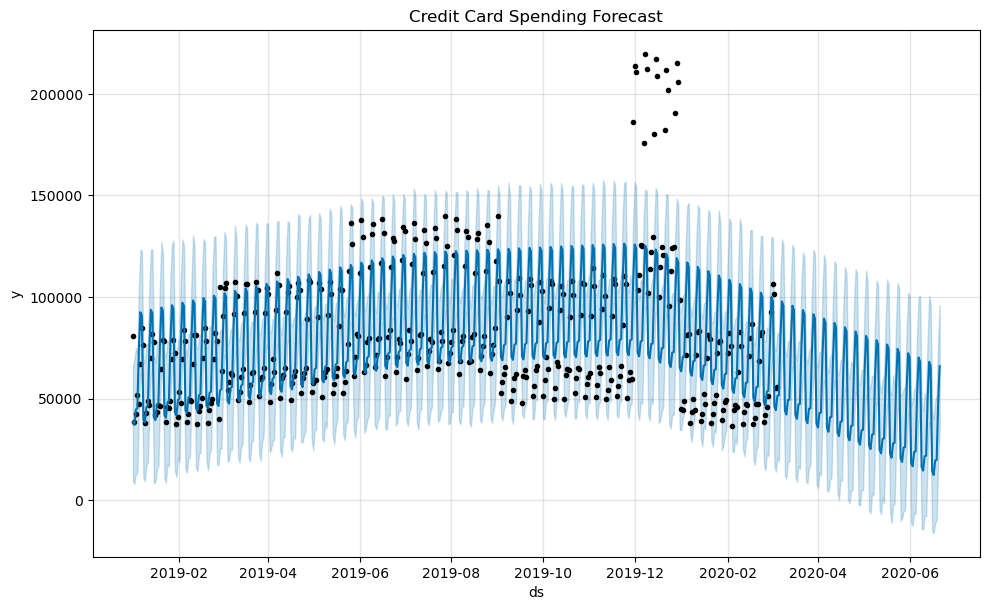

In [156]:
#  Plot Forecast
fig = model.plot(forecast)
plt.title("Credit Card Spending Forecast")
plt.show()

In [157]:
#  Model Evaluation (MAE, RMSE)
y_true = test['y'].values  # Actual values
y_pred = forecast['yhat'].iloc[-len(test):].values  # Predicted values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

In [158]:
print(f" Model Evaluation Metrics:")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Root Mean Square Error (RMSE): {rmse:.2f}")

 Model Evaluation Metrics:
 Mean Absolute Error (MAE): 33485.13
 Root Mean Square Error (RMSE): 43003.53
